# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd

# File to Load (Remember to change these)
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# total_rides_by_type_urban =    pyber_data_df.groupby(pyber_data_df['type'] == "Urban").count()[['driver_count']]
# total_rides_by_type_suburban =    pyber_data_df.groupby(pyber_data_df['type'] == "Suburban").count()[['driver_count']]
# total_rides_by_type_rural =    pyber_data_df.groupby(pyber_data_df['type'] == "Rural").count()[['driver_count']]

# print(total_rides_by_type_urban)
# print(total_rides_by_type_suburban)
# print(total_rides_by_type_rural)
# print(total_rides_by_type_urban+total_rides_by_type_suburban+total_rides_by_type_rural)


rideCount = pyber_data_df.groupby([pyber_data_df['type'],pyber_data_df['city'],pyber_data_df['driver_count']]).count()[['ride_id']]
rideCount

rideCount = pyber_data_df.groupby([pyber_data_df['type'],pyber_data_df['city'],pyber_data_df['driver_count']]).count()[['ride_id']]
total_rides_by_type = pyber_data_df.groupby([pyber_data_df['type']]).count()[['driver_count']]
total_rides_by_type

,driver_count
type,
Rural,125
Suburban,625
Urban,1625


In [4]:
# 2. Get the total drivers for each city type


total_drivers_by_type =city_data_df.groupby([city_data_df['type']]).sum()[['driver_count']]
print(total_drivers_by_type)

print((total_drivers_by_type).sum())
total_drivers_by_type

          driver_count
type                  
Rural               78
Suburban           490
Urban             2405
driver_count    2973
dtype: int64


,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [5]:
#  3. Get the total amount of fares for each city type

total_amountfare_by_type = pyber_data_df.groupby(pyber_data_df['type']).sum()[['fare']]
total_amountfare_by_type
# pyber_data_df

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [6]:
#  4. Get the average fare per ride for each city type. 
total_avgfare_by_type = pyber_data_df.groupby(pyber_data_df['type']).mean()[['fare']]
total_avgfare_by_type

,fare
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [7]:
 # city, diver count, type

len(pyber_data_df['city'].unique())


120

In [8]:
# 5. Get the average fare per driver for each city type. 
total_avgfare_by_driver_type = pyber_data_df.groupby([pyber_data_df['type']]).sum()[['fare']]
# print(total_avgfare_by_driver_type)

# total_avgfare_by_driver_type.groupby(total_avgfare_by_driver_type['type'])
print(total_drivers_by_type)
# total_drivers_avg_df = pd.merge(total_avgfare_by_driver_type,total_drivers_by_type,how="left", on=["type"])
#  total_drivers_avg_df['fare']/total_drivers_avg_df['driver_count']


# total_avgfare_by_driver_type =total_avgfare_by_driver_type.sort_values('fare',ascending=False)


print(total_avgfare_by_driver_type)
average_fare_per_driver_df = pd.DataFrame(
    {"avg":  (total_avgfare_by_driver_type['fare']/total_drivers_by_type['driver_count'])})
average_fare_per_driver_df

          driver_count
type                  
Rural               78
Suburban           490
Urban             2405
              fare
type              
Rural      4327.93
Suburban  19356.33
Urban     39854.38


,avg
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [9]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
      
     "Total Rides":total_rides_by_type['driver_count'],
    "Total Drivers": total_drivers_by_type['driver_count'],
    "Total Fares": total_amountfare_by_type['fare'],
    "Avg Fare per ride": total_avgfare_by_type['fare'],
     "Avg Fare per driver":average_fare_per_driver_df['avg']
})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per ride,Avg Fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per ride,Avg Fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.


pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare per ride"] = pyber_summary_df["Avg Fare per ride"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare per driver"] = pyber_summary_df["Avg Fare per driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per ride,Avg Fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_summary_df
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_type_date =     pyber_data_df.groupby([pyber_data_df['date'] ,pyber_data_df['type']]).sum()[['fare']]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fares_type_date_df = sum_fares_type_date.reset_index()
sum_fares_type_date_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df= pd.pivot_table(sum_fares_type_date_df, index = ["date"], columns = 'type', values ='fare')
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pivot_daterange_df = pivot_df.loc['2019-01-01':'2019-04-29',:]

pivot_daterange_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
print(pivot_daterange_df.info())
pivot_daterange_df.index =  pd.to_datetime(pivot_daterange_df.index)
pivot_daterange_df

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB
None


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_daterange_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_sum_Rural = pd.DataFrame({"Fare" : pivot_daterange_df.Rural.resample('W').sum()})


weekly_fare_sum_Suburban =pd.DataFrame({"Fare" : pivot_daterange_df.Suburban.resample('W').sum()})
weekly_fare_sum_Urban =pd.DataFrame({"Fare" : pivot_daterange_df.Urban.resample('W').sum()})

print(weekly_fare_sum_Rural.sum())
print(weekly_fare_sum_Suburban.sum())
print(weekly_fare_sum_Urban.sum())
weekly_fare_sum_Rural


weekly_fare_sum_Rural = weekly_fare_sum_Rural.reset_index()
weekly_fare_sum_Suburban = weekly_fare_sum_Suburban.reset_index()
weekly_fare_sum_Urban = weekly_fare_sum_Urban.reset_index()
weekly_fare_sum_Rural

Fare    3913.69
dtype: float64
Fare    17883.34
dtype: float64
Fare    37065.78
dtype: float64


,date,Fare
0,2019-01-06,187.92
1,2019-01-13,67.65
2,2019-01-20,306.00
3,2019-01-27,179.69
4,2019-02-03,333.08
5,2019-02-10,115.80
6,2019-02-17,95.82
7,2019-02-24,419.06
8,2019-03-03,175.14
9,2019-03-10,303.94


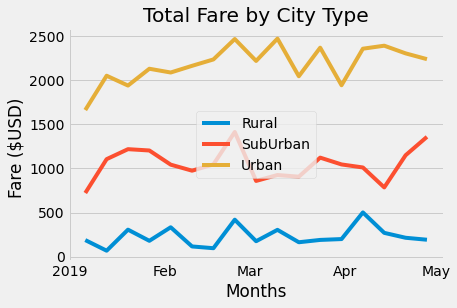

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import numpy as np
import matplotlib as mlp 
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig ,ax = plt.subplots()

# apply autoformatter for displaying of dates

years = mlp.dates.YearLocator()
months = mlp.dates.MonthLocator()
monthsFmt = mlp.dates.DateFormatter('%b')
yearsFmt = mlp.dates.DateFormatter('%Y')


ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

ax.set_ylabel("Fare ($USD) ")
ax.set_title ("Total Fare by City Type")
ax.set_xlabel ("Months")

label_list = ['Rural','SubUrban','Urban']

plt.plot(weekly_fare_sum_Rural['date'], weekly_fare_sum_Rural['Fare' ])
plt.plot(weekly_fare_sum_Suburban['date'], weekly_fare_sum_Suburban['Fare'])
plt.plot(weekly_fare_sum_Urban['date'], weekly_fare_sum_Urban['Fare'])

ax.legend(label_list)

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
